In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
x = data['data']
y = data['target']

In [12]:
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt

# Pre-processing data

In [6]:
x_std = skl.preprocessing.scale(x)

In [7]:
np.mean(x_std,axis=0)

array([-1.69031455e-15, -1.63702385e-15, -1.48251781e-15, -1.62314606e-15])

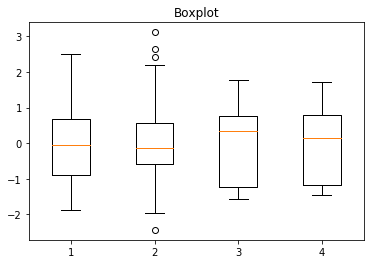

In [14]:
fig1,ax1 = plt.subplots()
ax1.set_title('Boxplot')
ax1.boxplot(x_std)
plt.show()

# Modelling

## K-Means

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(x_std)

In [22]:
y_pred = kmeans.labels_

In [23]:
pd.crosstab(y,y_pred)

col_0,0,1,2
row_0,,,
0,0,50,0
1,39,0,11
2,14,0,36


In [24]:
(50+39+36)/150

0.8333333333333334

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [27]:
clf_dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=5)
model_dt=clf_dt.fit(x_std,y)

In [31]:
model_dt.feature_importances_

array([0.00380936, 0.        , 0.05037841, 0.94581223])

In [33]:
dt_tree = model_dt.tree_

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

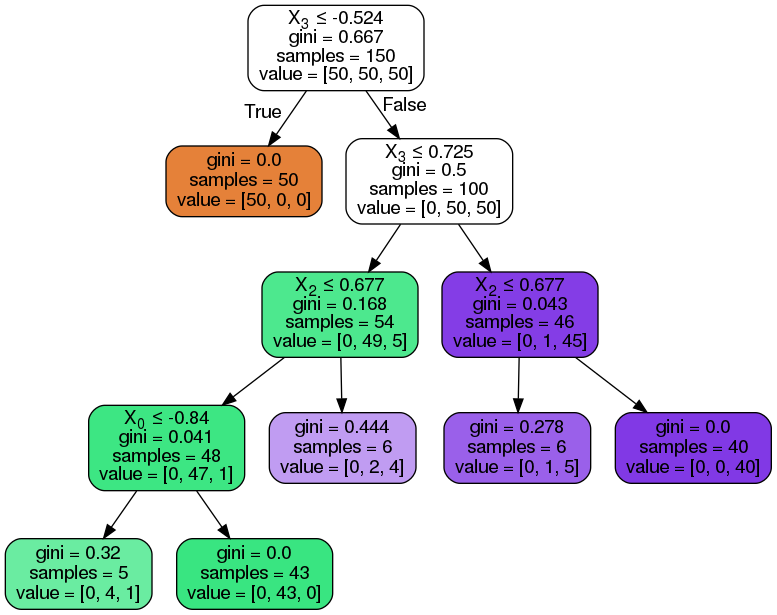

In [40]:
dot_data = StringIO()

export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
y_pred = model_dt.predict(x_std)

In [44]:
pd.crosstab(y,y_pred)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,1,49


In [45]:
(50+47+49)/150

0.9733333333333334